# **Pré-processamento - Limpeza**

## **Definindo as features**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dataset_ies.csv')

In [ ]:
df.head(3)

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406.0,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201.0,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308.0,Aracaju,SE,NORDESTE


In [ ]:
df.shape

(840406, 18)

In [ ]:
df.columns

Index(['CODIGO_IES', 'NOME_IES', 'CATEGORIA_ADMINISTRATIVA',
       'ORGANIZACAO_ACADEMICA', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU',
       'AREA_OCDE', 'MODALIDADE', 'SITUACAO_CURSO', 'QT_VAGAS_AUTORIZADAS',
       'CARGA_HORARIA', 'CODIGO_AREA_OCDE_CINE', 'AREA_OCDE_CINE',
       'CODIGO_MUNICIPIO', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')

In [ ]:
df.nunique()

CODIGO_IES                   3663
NOME_IES                     3631
CATEGORIA_ADMINISTRATIVA        6
ORGANIZACAO_ACADEMICA           6
CODIGO_CURSO                80919
NOME_CURSO                   2122
GRAU                            5
AREA_OCDE                     402
MODALIDADE                      2
SITUACAO_CURSO                  3
QT_VAGAS_AUTORIZADAS          851
CARGA_HORARIA                3365
CODIGO_AREA_OCDE_CINE         421
AREA_OCDE_CINE                512
CODIGO_MUNICIPIO             3422
MUNICIPIO                    3308
UF                             28
REGIAO                          6
dtype: int64

Percebi que a coluna CODIGO_IES variava o código mesmo sendo para o mesmo curso. Por isso não fazer uso dele.

Percebe-se uma diferença entre o CODIGO_IES e CODIGO_MUNICIPIO, e NOME_IES e MUNICIPIO. Indicando possíveis erros no preenchimento do dataset.

In [ ]:
df['AREA_OCDE'].unique()

array(['Agronomia',
       'Formação de professor de língua/literatura vernácula (português)',
       'Formação de professor de geografia', 'Educação física', nan,
       'Análise e Desenvolvimento de Sistemas (Tecnólogo)',
       'Gestão da informação', 'Formação de professor de dança',
       'Ciências contábeis', 'Administração',
       'Formação de professor de artes visuais',
       'Saúde e segurança no trabalho',
       'Formação de professor de língua/literatura estrangeira moderna',
       'Formação de professor de língua/literatura vernácula e língua estrangeira moderna',
       'Engenharia de produção',
       'Formação de professor de educação especial',
       'Sistemas de informação', 'Negócios internacionais',
       'Produção industrial', 'Engenharia química',
       'Administração hospitalar', 'Biomedicina',
       'Extração de petróleo e gás', 'Secretariado', 'Teologia',
       'Gestão de Turismo', 'Saúde (programas ou cursos gerais)',
       'Uso da internet', 'Forma

In [ ]:
df['AREA_OCDE_CINE'].unique()

array(['Agronomia',
       'Formação de professor de língua/literatura vernácula (português)',
       'Formação de professor de geografia', 'Educação física',
       'Serviços penais', 'Gestão comercial',
       'Análise e Desenvolvimento de Sistemas (Tecnólogo)',
       'Gestão da informação', 'Formação de professor de dança',
       'Agrocomputação', 'Ciências contábeis', 'Administração',
       'Formação de professor de artes visuais',
       'Saúde e segurança no trabalho', 'Jogos digitais',
       'Serviços jurídicos e cartoriais',
       'Formação de professor de língua/literatura estrangeira moderna',
       'Formação de professor de língua/literatura vernácula e língua estrangeira moderna',
       'Gestão de negócios', 'Engenharia de produção',
       'Formação de professor de educação especial',
       'Sistemas de informação', 'Negócios internacionais',
       'Produção industrial', 'Engenharia química', 'Logística',
       'Administração hospitalar', 'Design gráfico', 'Biome

A coluna AREA_OCDE e AREA_OCDE_CINE consistia em várias variáveis muito diversas e que não representava com abrangência área no sentido geral, e sim em sentido mais específico. Exemplo: ao invés da área ser educação, eles colocam Pedagogia, assim como, Educação Física ao invés de ser da área saúde, é a própria educação física. Então para fins de avaliação não quer dizer muita coisa.

In [ ]:
df = df.drop(columns=['CODIGO_IES',
                      'CODIGO_CURSO',
                      'AREA_OCDE',
                      'CODIGO_AREA_OCDE_CINE',
                      'AREA_OCDE_CINE',
                      'CODIGO_MUNICIPIO'])

In [ ]:
df.columns

Index(['NOME_IES', 'CATEGORIA_ADMINISTRATIVA', 'ORGANIZACAO_ACADEMICA',
       'NOME_CURSO', 'GRAU', 'MODALIDADE', 'SITUACAO_CURSO',
       'QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')

In [ ]:
df.head(3)

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
0,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,ENGENHARIA AGRONÔMICA,Bacharelado,Educação a Distância,Em atividade,1000,4400,Presidente Prudente,SP,SUDESTE
1,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,LETRAS,Licenciatura,Educação a Distância,Em atividade,3000,3992,Sousa,PB,NORDESTE
2,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,GEOGRAFIA,Licenciatura,Educação a Distância,Em atividade,7620,3500,Aracaju,SE,NORDESTE


## **Exploração do dataframe**

In [ ]:
df.shape

(840406, 12)

In [ ]:
df['CATEGORIA_ADMINISTRATIVA'].unique()

array(['Privada com fins lucrativos', 'Privada sem fins lucrativos',
       'Pública Municipal', 'Pública Federal', 'Pública Estadual',
       'Especial'], dtype=object)

In [ ]:
df['ORGANIZACAO_ACADEMICA'].unique()

array(['Centro Universitário', 'Universidade', 'Faculdade',
       'Instituto Federal de Educação, Ciência e Tecnologia',
       'Centro Federal de Educação Tecnológica',
       'Instituição Especialmente Credenciada para oferta de cursos lato sensu'],
      dtype=object)

In [ ]:
df['GRAU'].unique()

array(['Bacharelado', 'Licenciatura', 'Tecnológico',
       'Área Básica de Ingresso (ABI)', 'Sequencial'], dtype=object)

In [ ]:
df['MODALIDADE'].unique()

array(['Educação a Distância', 'Educação Presencial'], dtype=object)

In [ ]:
df['SITUACAO_CURSO'].unique()

array(['Em atividade', 'Em extinção', 'Extinto'], dtype=object)

In [ ]:
df['UF'].unique()

array(['SP', 'PB', 'SE', 'PR', 'PE', 'RN', 'SC', 'RJ', 'RS', 'GO', 'BA',
       'MG', 'MT', 'CE', 'PA', 'RO', 'TO', 'AM', 'ES', 'AC', 'MA', 'AL',
       'DF', 'ZZ', 'MS', 'PI', 'RR', 'AP', nan], dtype=object)

In [ ]:
df[df['UF']=='ZZ'].head()

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
182,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,PROCESSOS QUÍMICOS,Tecnológico,Educação a Distância,Em atividade,1000,2488,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR
528,FATEC - FACULDADE DE TEOLOGIA E CIÊNCIAS DE VO...,Privada sem fins lucrativos,Faculdade,PEDAGOGIA,Licenciatura,Educação a Distância,Em atividade,300,3366,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR
1585,UNIVERSIDADE CESUMAR,Privada com fins lucrativos,Universidade,HISTÓRIA,Licenciatura,Educação a Distância,Em atividade,10000,3280,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR
2113,Claretiano - Centro Universitário,Privada sem fins lucrativos,Centro Universitário,SECRETARIADO,Tecnológico,Educação a Distância,Em atividade,382,1600,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR
2166,CENTRO UNIVERSITÁRIO FAEL,Privada com fins lucrativos,Centro Universitário,GEOGRAFIA,Licenciatura,Educação a Distância,Em atividade,6000,3400,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR


In [ ]:
df[df['UF']=='ZZ'].nunique()

NOME_IES                     25
CATEGORIA_ADMINISTRATIVA      2
ORGANIZACAO_ACADEMICA         3
NOME_CURSO                  184
GRAU                          3
MODALIDADE                    1
SITUACAO_CURSO                3
QT_VAGAS_AUTORIZADAS         77
CARGA_HORARIA               162
MUNICIPIO                     1
UF                            1
REGIAO                        1
dtype: int64

Existem pouco menos de 200 cursos na categoria ZZ.

In [ ]:
df['REGIAO'].unique()

array(['SUDESTE', 'NORDESTE', 'SUL', 'CENTRO-OESTE', 'NORTE',
       'IGNORADO/EXTERIOR', nan], dtype=object)

In [ ]:
df[df['REGIAO']=='IGNORADO/EXTERIOR'].nunique()

NOME_IES                     25
CATEGORIA_ADMINISTRATIVA      2
ORGANIZACAO_ACADEMICA         3
NOME_CURSO                  184
GRAU                          3
MODALIDADE                    1
SITUACAO_CURSO                3
QT_VAGAS_AUTORIZADAS         77
CARGA_HORARIA               162
MUNICIPIO                     1
UF                            1
REGIAO                        1
dtype: int64

Dado que a categoria da UF ZZ e a categoria REGIAO IGNORADO/EXTERIOR tem a mesma quantidade de cursos, então ambos correspondem ao mesmo perfil.

In [ ]:
df[df['NOME_CURSO'] == 'PSICOPEDAGOGIA']['GRAU'].value_counts()

GRAU
Bacharelado     4243
Licenciatura    1555
Name: count, dtype: int64

In [ ]:
df[df['NOME_CURSO'] == 'SECRETARIADO']['GRAU'].value_counts()

GRAU
Tecnológico    6072
Bacharelado       3
Name: count, dtype: int64

In [ ]:
df[df['NOME_CURSO'] == 'EDUCAÇÃO ESPECIAL']['GRAU'].value_counts()

GRAU
Licenciatura    5879
Name: count, dtype: int64

## **Tratamento de valores ausentes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840406 entries, 0 to 840405
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   NOME_IES                  840406 non-null  object
 1   CATEGORIA_ADMINISTRATIVA  840406 non-null  object
 2   ORGANIZACAO_ACADEMICA     840406 non-null  object
 3   NOME_CURSO                840406 non-null  object
 4   GRAU                      840406 non-null  object
 5   MODALIDADE                840406 non-null  object
 6   SITUACAO_CURSO            840406 non-null  object
 7   QT_VAGAS_AUTORIZADAS      840406 non-null  int64 
 8   CARGA_HORARIA             840406 non-null  int64 
 9   MUNICIPIO                 840405 non-null  object
 10  UF                        840405 non-null  object
 11  REGIAO                    840405 non-null  object
dtypes: int64(2), object(10)
memory usage: 76.9+ MB


In [ ]:
df.isnull().sum()

NOME_IES                    0
CATEGORIA_ADMINISTRATIVA    0
ORGANIZACAO_ACADEMICA       0
NOME_CURSO                  0
GRAU                        0
MODALIDADE                  0
SITUACAO_CURSO              0
QT_VAGAS_AUTORIZADAS        0
CARGA_HORARIA               0
MUNICIPIO                   1
UF                          1
REGIAO                      1
dtype: int64

## **Outliers e ruídos**

In [ ]:
df.sort_values(by=['QT_VAGAS_AUTORIZADAS'], ascending=False).head(50)

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
535442,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Palmas,TO,NORTE
139306,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Cansanção,BA,NORDESTE
702770,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Salvador,BA,NORDESTE
825154,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Ipiaú,BA,NORDESTE
831619,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Duque de Caxias,RJ,SUDESTE
645620,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Ruy Barbosa,BA,NORDESTE
490833,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Iaçu,BA,NORDESTE
204037,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Feira de Santana,BA,NORDESTE
762790,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Bagé,RS,SUL
158453,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Nova Iguaçu,RJ,SUDESTE


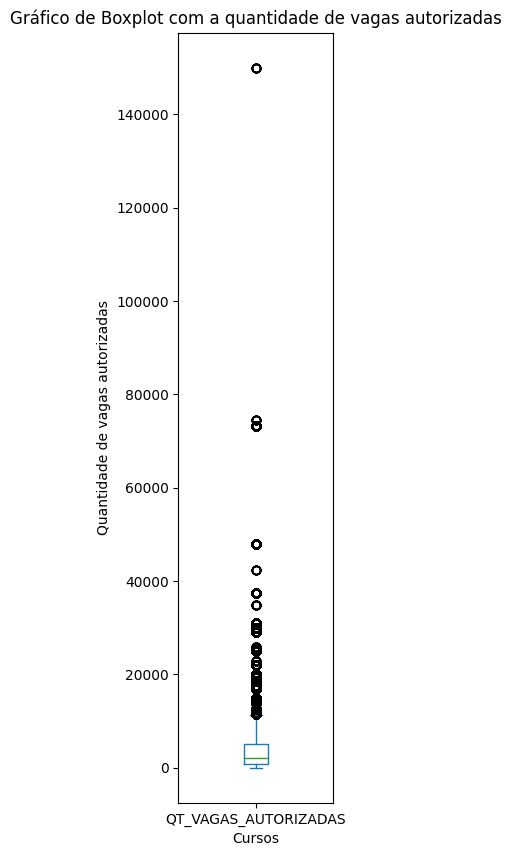

In [ ]:
plt.figure(figsize=(2,10))
df['QT_VAGAS_AUTORIZADAS'].plot.box()

plt.title('Gráfico de Boxplot com a quantidade de vagas autorizadas')
plt.ylabel('Quantidade de vagas autorizadas')
plt.xlabel('Cursos')

plt.show()

Não tem nenhum ruído, haja vista que é bem comum ter cursos EaD tecnólogos com muitas vagas.

**Analisar se existe algum ruído em carga horária.** ❗

In [ ]:
df['NOME_CURSO'].value_counts().head()

NOME_CURSO
ADMINISTRAÇÃO                 21420
PEDAGOGIA                     21048
EDUCAÇÃO FÍSICA               17559
CIÊNCIAS CONTÁBEIS            16303
GESTÃO DE RECURSOS HUMANOS    15175
Name: count, dtype: int64

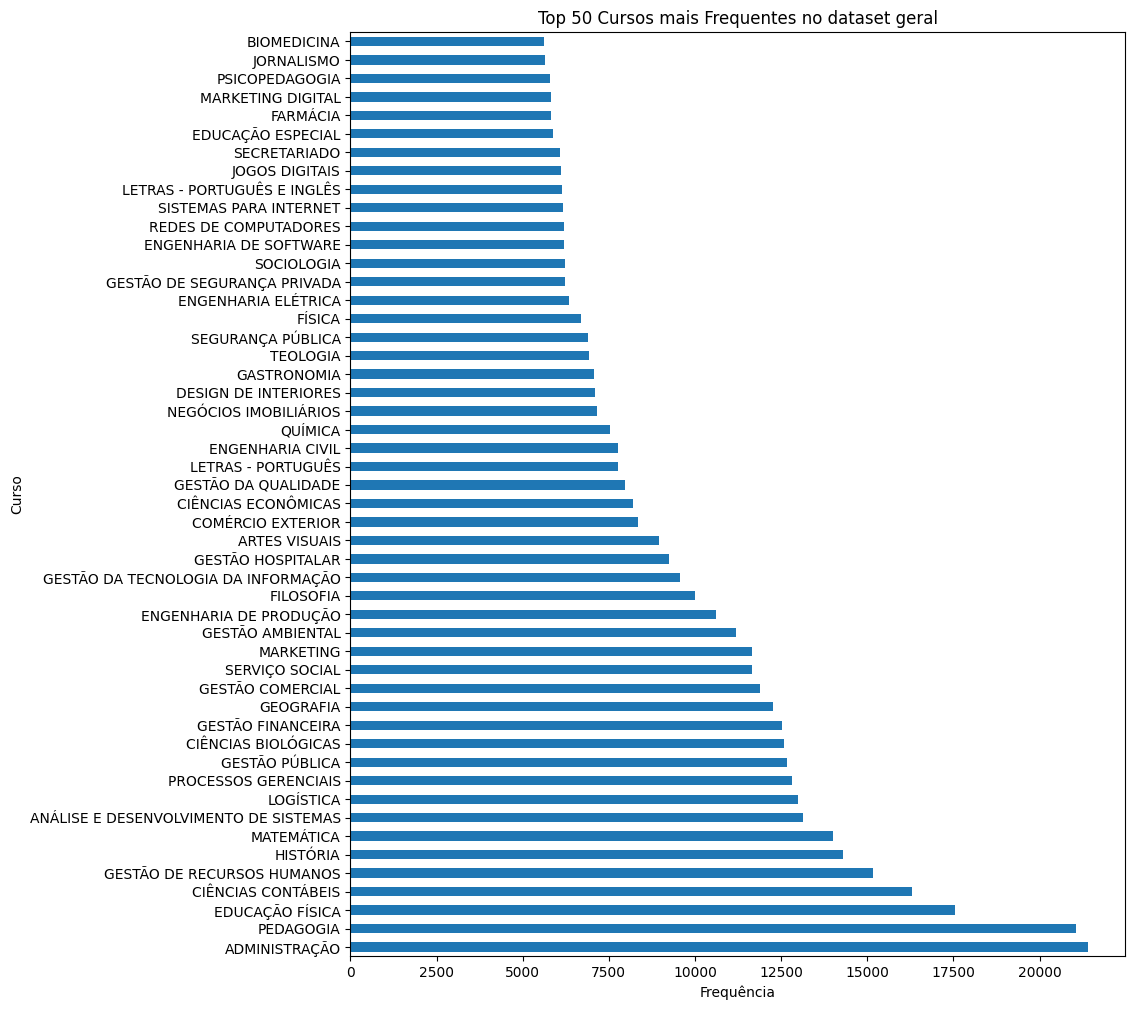

In [ ]:
df['NOME_CURSO'].value_counts().sort_values(ascending=False).head(50).plot.barh(figsize=(10, 12))
plt.title('Top 50 Cursos mais Frequentes no dataset geral')
plt.xlabel('Frequência')
plt.ylabel('Curso')
plt.show()

Necessário levar em conta que os dados anteriores também incluem cursos em atividade e extintos.

**Limpar cursos com UF ZZ e região EXTERIOR/IGNORADO** ❗

# **Pré-processamento - Transformação**

In [ ]:
df.dtypes

NOME_IES                    object
CATEGORIA_ADMINISTRATIVA    object
ORGANIZACAO_ACADEMICA       object
NOME_CURSO                  object
GRAU                        object
MODALIDADE                  object
SITUACAO_CURSO              object
QT_VAGAS_AUTORIZADAS         int64
CARGA_HORARIA                int64
MUNICIPIO                   object
UF                          object
REGIAO                      object
dtype: object

# **Análises**

## **Refinamento**

In [ ]:
dfa = df[df['SITUACAO_CURSO'] == 'Em atividade'] # dataframe apenas com cursos em atividades

In [ ]:
dfa.shape

(794155, 12)

In [ ]:
df.shape

(840406, 12)

Com esse refinamento tivemos uma redução de 49.756 cursos.

## **Distribuição dos cursos por região**

- Explorar a distribuição geográfica dos cursos de graduação no Brasil por estado.
- Identificar quais estados possuem mais cursos e quais têm menos.
- Analisar se existe alguma correlação entre a disponibilidade de cursos e indicadores socioeconômicos das regiões.

In [ ]:
dfa['REGIAO'].value_counts()

REGIAO
SUDESTE              302256
NORDESTE             180804
SUL                  166393
NORTE                 73951
CENTRO-OESTE          70202
IGNORADO/EXTERIOR       548
Name: count, dtype: int64

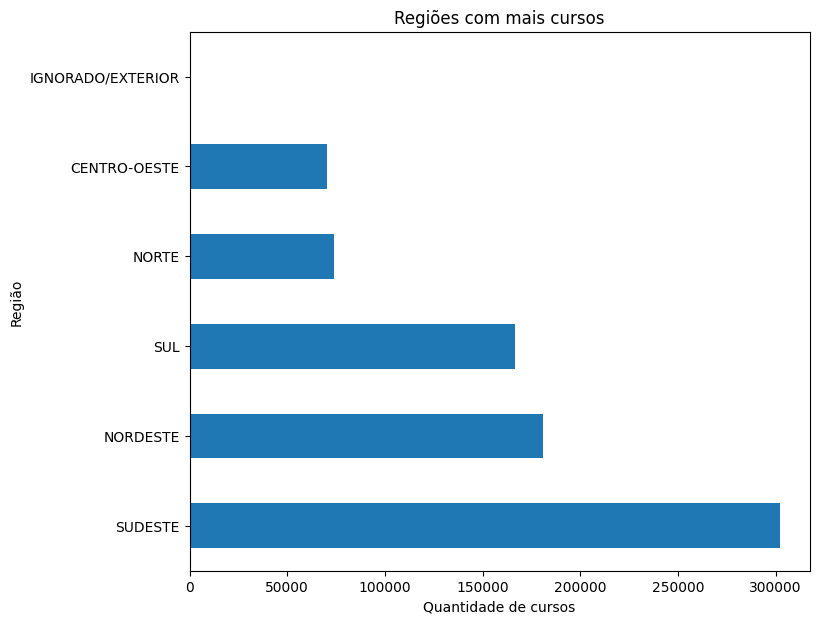

In [ ]:
dfa['REGIAO'].value_counts().plot.barh(figsize=(8, 7))
plt.title('Regiões com mais cursos')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Região')
plt.show()

In [ ]:
dfa['UF'].value_counts()

UF
SP    145246
MG     95641
PR     65862
RS     59048
BA     54948
RJ     41769
SC     41483
PA     35547
CE     31745
GO     28916
PE     24577
MA     23967
MT     21720
ES     19600
MS     16055
AM     10818
PB     10815
RO      9991
PI      9690
RN      8840
AL      8412
SE      7810
TO      7469
AC      4779
DF      3511
AP      2737
RR      2610
ZZ       548
Name: count, dtype: int64

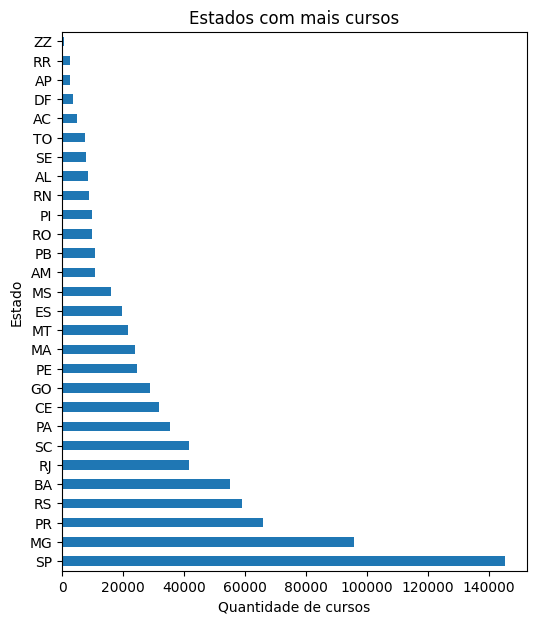

In [ ]:
dfa['UF'].value_counts().plot.barh(figsize=(6, 7))
plt.title('Estados com mais cursos')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Estado')
plt.show()

In [ ]:
cursos_rn = dfa[dfa['UF'] == 'RN']
cursos_rn['MUNICIPIO'].value_counts().head(15)

MUNICIPIO
Natal                      1737
Mossoró                    1178
Parnamirim                  764
Currais Novos               503
Caicó                       488
Ceará-Mirim                 458
Apodi                       417
Açu                         387
Pau dos Ferros              345
Macaíba                     292
João Câmara                 211
Santa Cruz                  169
Macau                       158
São Gonçalo do Amarante     157
Canguaretama                133
Name: count, dtype: int64

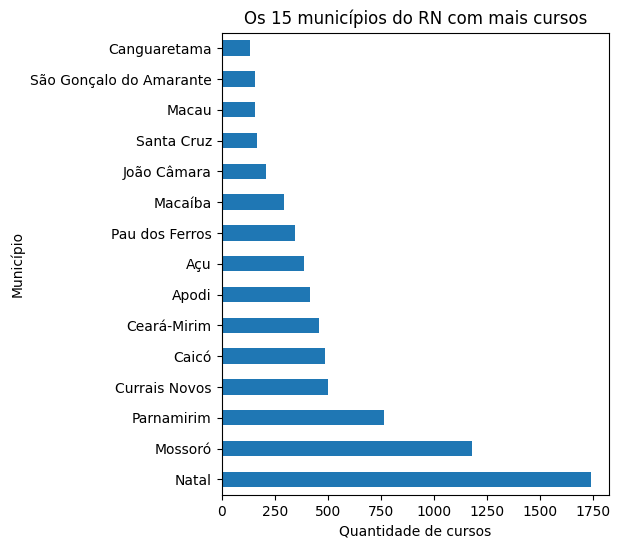

In [ ]:
cursos_rn['MUNICIPIO'].value_counts().head(15).plot.barh(figsize=(5, 6))
plt.title('Os 15 municípios do RN com mais cursos')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Município')
plt.show()

## **Perfil dos cursos por modalidade de ensino**

- Comparar a quantidade e a distribuição dos cursos de graduação presenciais e a distância (EaD).
- Analisar se existe diferenças nas áreas de estudo mais comuns entre as duas modalidades, bem como na carga horária e no grau dos cursos.

## **Situação dos cursos**

- Avaliar a proporção de cursos ativos e inativos e investigar os motivos para a inatividade desses cursos.
- Analisar se existe alguma relação entre a situação dos cursos e a categoria da instituição de ensino superior.


## **Clusterização de cursos por área de estudo**

- Agrupar os cursos de graduação em clusters com base em suas áreas de estudo. Explorar se existem padrões comuns entre os cursos dentro de cada cluster e se é possível identificar grupos de cursos com características semelhantes.